In [1]:
import sys
# import sibling folder
sys.path.append("..")

In [2]:
import os
import numpy as np
import pandas as pd
from llama_cpp import Llama

import experiments.utils as utils
from pprint import pprint
from IPython.display import display_markdown

In [3]:
!pwd

/Users/mahat/Desktop/Dev/JB_Project/sentiment-analysis/notebooks


In [4]:
plots_base_path = '../docs/plots/experiments/simple_prompt'

In [5]:
# init datasets
valid_ds_mini, valid_ds_small, incontext_ds_small, valid_ds_big, incontext_ds_big = utils.load_ds()
test_ds = utils.load_test()
# model names
small_model_repo_id="bartowski/Qwen2.5-0.5B-Instruct-GGUF"
small_model_file_name="Qwen2.5-0.5B-Instruct-IQ2_M.gguf"

big_model_repo_id="bartowski/Qwen2.5-1.5B-Instruct-GGUF"
big_model_file_name="Qwen2.5-1.5B-Instruct-IQ2_M.gguf"

In [6]:
# setup big model
big_llm = Llama.from_pretrained(
    repo_id=big_model_repo_id,
    filename=big_model_file_name,
    n_ctx = 4096,
    verbose=False,
    seed=42
)


llama_init_from_model: n_ctx_per_seq (4096) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

## Simple Prompt using Big Model

In [7]:
# experiment init
from experiments.simple_prompt_experiment import SimplePromptExperiment
simple_prompt_exp  = SimplePromptExperiment(model=big_llm, n_ctx=4096, valid_ds=valid_ds_big)

display_markdown(f"### System and User Prompts", raw=True)
display_markdown(f"**System Prompt**: {simple_prompt_exp.system_prompt}", raw=True)
display_markdown(f"**User Prompt**: {simple_prompt_exp.user_prompt}", raw=True)

### System and User Prompts

**System Prompt**: You are a helpful large language model that understands sentiment of a review inside <review>...</review> tags. 
Your final answer must be either Negative or Positive based on the sentiment of the review.

**User Prompt**: <review>{review}</review> 

Your final answer is

running validation set: 100%|██████████| 512/512 [07:13<00:00,  1.18it/s]

{'accuracy': 0.91015625,
 'confusion_matrix': array([[218,  38],
       [  8, 248]]),
 'f1_score': 0.915129151291513,
 'precision': 0.8671328671328671,
 'recall': 0.96875,
 'valid_answer_ratio': np.float64(1.0)}


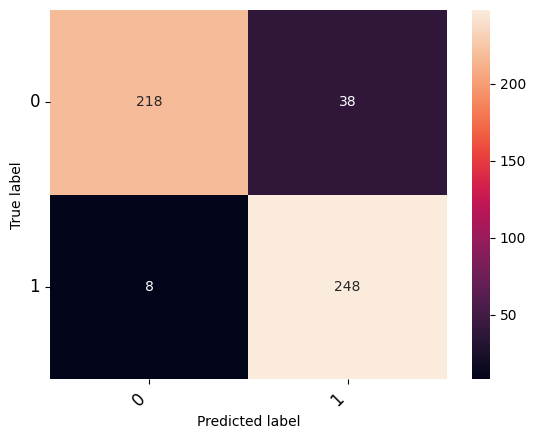

In [8]:
# running model with default parameeters
simple_prompt_eval = simple_prompt_exp().eval()
pprint(simple_prompt_eval)
big_model_cm_fig=utils.plot_cm(simple_prompt_eval['confusion_matrix'])
big_model_cm_fig.savefig(f"{plots_base_path}/cm_big_default.png")

running validation set: 100%|██████████| 256/256 [04:13<00:00,  1.01it/s]

{'accuracy': 0.90625,
 'confusion_matrix': array([[135,  21],
       [  3,  97]]),
 'f1_score': 0.8899082568807339,
 'precision': 0.8220338983050848,
 'recall': 0.97,
 'valid_answer_ratio': np.float64(1.0)}


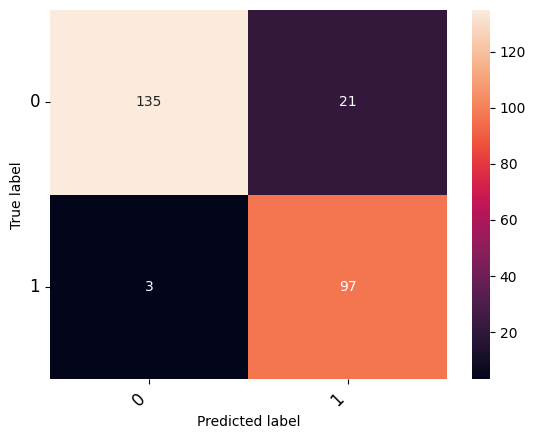

In [9]:
simple_prompt_exp.valid_ds = test_ds
simple_prompt_test = simple_prompt_exp().eval()
big_model_test_fig=utils.plot_cm(simple_prompt_test['confusion_matrix'])
big_model_test_fig.savefig(f"{plots_base_path}/cm_big_test.png")
pprint(simple_prompt_test)

### Small Model Run for Simple Prompt

llama_init_from_model: n_ctx_per_seq (4096) < n_ctx_train (32768) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_b

{'accuracy': 0.8145161290322581,
 'confusion_matrix': array([[58,  4],
       [19, 43]]),
 'f1_score': 0.7889908256880734,
 'precision': 0.9148936170212766,
 'recall': 0.6935483870967742,
 'valid_answer_ratio': np.float64(0.96875)}


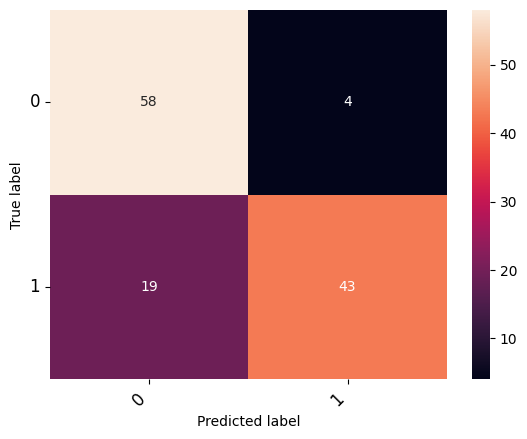

In [10]:
small_llm = Llama.from_pretrained(
    repo_id=small_model_repo_id,
    filename=small_model_file_name,
    n_ctx = 4096,
    verbose=False
)
simple_prompt_exp = SimplePromptExperiment(model=small_llm, n_ctx=4096, valid_ds=valid_ds_small)
# append stop
# simple_prompt_exp.stop = stop_words
simple_prompt_eval = simple_prompt_exp().eval()
pprint(simple_prompt_eval)
small_model_cm_fig=utils.plot_cm(simple_prompt_eval['confusion_matrix'])
small_model_cm_fig.savefig(f'{plots_base_path}/cm_small_default.png')

### Measuring affect of temparature for small model

0.2


running validation set: 100%|██████████| 64/64 [00:30<00:00,  2.08it/s]


0.4


running validation set: 100%|██████████| 64/64 [00:28<00:00,  2.21it/s]


0.6000000000000001


running validation set: 100%|██████████| 64/64 [00:23<00:00,  2.69it/s]


0.8


running validation set: 100%|██████████| 64/64 [00:22<00:00,  2.86it/s]


1.0


running validation set: 100%|██████████| 64/64 [00:21<00:00,  3.01it/s]


1.2000000000000002


running validation set: 100%|██████████| 64/64 [00:19<00:00,  3.24it/s]


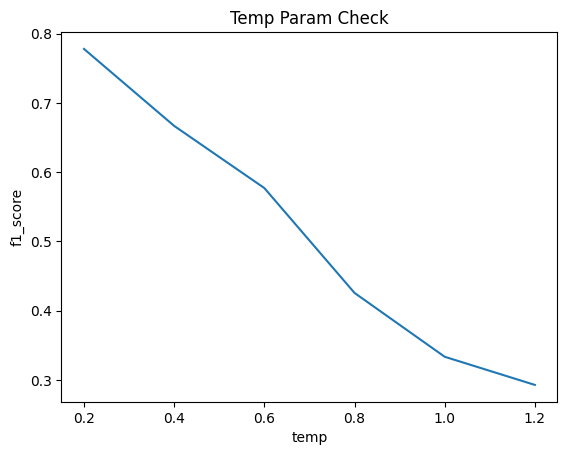

In [11]:
simple_prompt_exp = SimplePromptExperiment(model=small_llm, n_ctx=4096, valid_ds=valid_ds_mini)

metric_sp_temp = utils.temp_check_helper(simple_prompt_exp)
fig_temp = utils.plot_metrics(metric_sp_temp,x_key='temp',y_key='f1_score',title='Temp Param Check')
fig_temp.savefig(f'{plots_base_path}/temp_param_plot.png')

### Measuring affect of min_p for small model

0.05


running validation set: 100%|██████████| 64/64 [00:21<00:00,  3.02it/s]


0.1


running validation set: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]


0.15000000000000002


running validation set: 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]


0.2


running validation set: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]


0.25


running validation set: 100%|██████████| 64/64 [00:24<00:00,  2.57it/s]


0.30000000000000004


running validation set: 100%|██████████| 64/64 [00:23<00:00,  2.72it/s]


0.35000000000000003


running validation set: 100%|██████████| 64/64 [00:22<00:00,  2.85it/s]


0.4


running validation set: 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]


0.45


running validation set: 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]


0.5


running validation set: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]


0.55


running validation set: 100%|██████████| 64/64 [00:20<00:00,  3.12it/s]


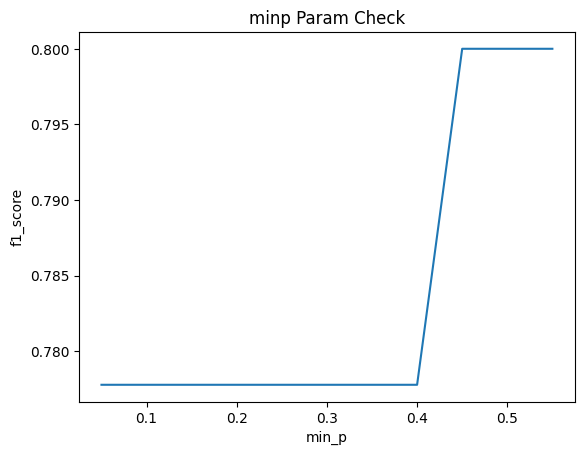

In [12]:
metric_sp_minp = utils.minP_check_helper(simple_prompt_exp,temp=0.2) # a small increase temp 
fig_minp = utils.plot_metrics(metric_sp_minp,x_key='min_p',y_key='f1_score',title='minp Param Check')
fig_minp.savefig(f'{plots_base_path}/minp_param_plot.png')

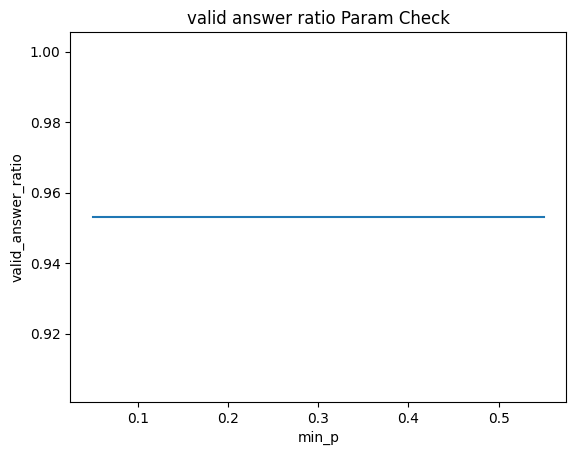

In [15]:
_ = utils.plot_metrics(metric_sp_minp,x_key='min_p',y_key='valid_answer_ratio',title='valid answer ratio Param Check')

In [13]:
# no need to run again because minp and temp config doesn't have any affect

running validation set: 100%|██████████| 256/256 [01:45<00:00,  2.43it/s]

{'accuracy': 0.8385826771653543,
 'confusion_matrix': array([[149,   6],
       [ 35,  64]]),
 'f1_score': 0.757396449704142,
 'precision': 0.9142857142857143,
 'recall': 0.6464646464646465,
 'valid_answer_ratio': np.float64(0.9921875)}


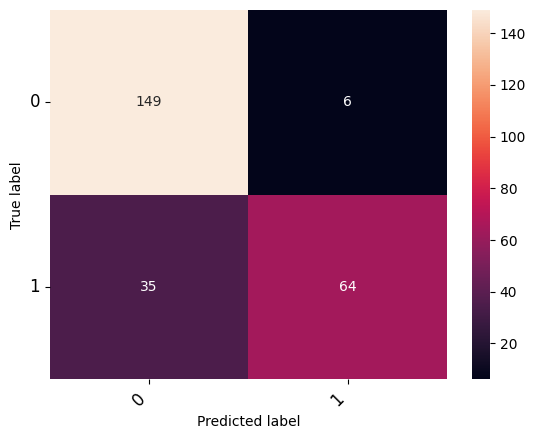

In [19]:
simple_prompt_exp.valid_ds = test_ds
simple_prompt_exp.temperature = 0.2
simple_prompt_exp.min_p = 0.45
simple_prompt_small_test = simple_prompt_exp().eval()
small_model_test_fig=utils.plot_cm(simple_prompt_small_test['confusion_matrix'])
small_model_test_fig.savefig(f"{plots_base_path}/cm_small_test.png")
pprint(simple_prompt_small_test)